In [ ]:
# Importings
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Load the Data in pandas
df = pd.read_csv('walmart.csv')

In [3]:
# Group by User_ID and calculate total pruchase amount
user_purchase = df.groupby('User_ID')['Purchase'].sum().reset_index()

In [4]:
X = user_purchase[['Purchase']].values

In [5]:
# Feature standarization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Elbow Method for optimal number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

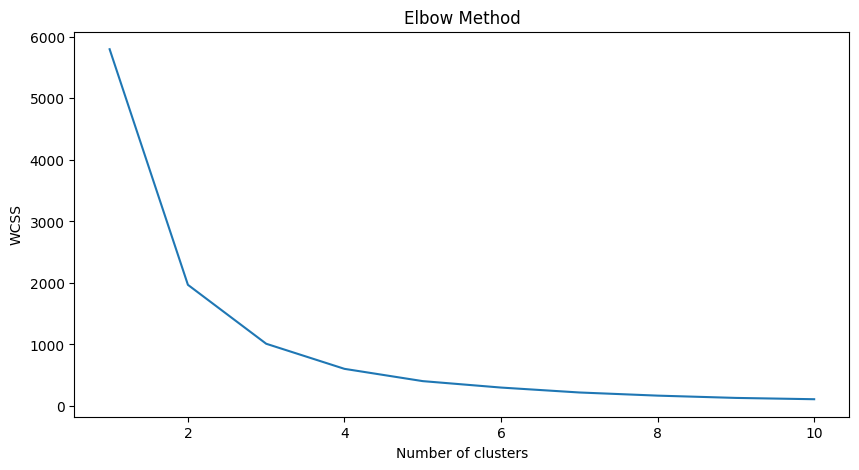

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_curve.png')
plt.show()

In [9]:
# Chosing 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

In [12]:
user_purchase['Cluster']= cluster_labels

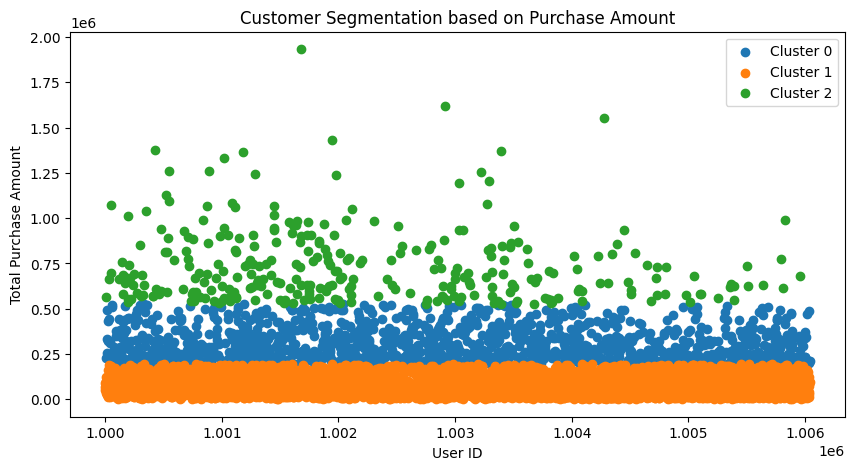

In [17]:
plt.figure(figsize=(10, 5))
for i in range(3):
    cluster_data = user_purchase[user_purchase['Cluster'] == i]
    plt.scatter(cluster_data['User_ID'], cluster_data['Purchase'], label=f'Cluster {i}')

plt.title('Customer Segmentation based on Purchase Amount')
plt.xlabel('User ID')
plt.ylabel('Total Purchase Amount')
plt.legend()
plt.savefig('customer_segments.png')
plt.show()

In [15]:
print(user_purchase.groupby('Cluster')['Purchase'].describe())

          count           mean            std       min       25%       50%  \
Cluster                                                                       
0        1236.0  311674.090615   90924.005956  193812.0  233922.0  290824.0   
1        4257.0   75259.079634   50439.461662     761.0   33736.0   63620.0   
2         305.0  740274.904918  207858.893951  527417.0  589643.0  674126.0   

              75%        max  
Cluster                       
0        373303.5   526304.0  
1        109982.0   193643.0  
2        829700.0  1932790.0  


In [18]:
summary_stats = user_purchase.groupby('Cluster')['Purchase'].describe()

In [19]:
# Output results to CSV
user_purchase.to_csv('customer_segments_K_means.csv', index=False)
summary_stats.to_csv('cluster_summary_stats.csv')